# Flight Fare Prediction

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [3]:
df = pd.read_csv("flight_fares_data.csv")

In [4]:
df.head()

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0
2,0868155ae620dd8e7cd462e601b5f559,2020-01-01 00:35:50 +0000,Mumbai,Raipur,Kolkata,NaN,Silchar,Air India|Air India|Air India,AI-651|AI-9728|AI-753,23Jan2020,09:40,24Jan2020,07:00,21h 20m,2,13518.0
3,26135ec458c4204ddf036eae4119dd90,2020-02-01 00:33:23 +0000,Nagpur,Mumbai,Goa,NaN,Pune,Air India|Air India|Air India,AI-630|AI-33|AI-9562,03Feb2020,21:10,04Feb2020,14:45,17h 35m,2,12528.0
4,c29198e6745d72220af30969f05a7841,2020-01-01 00:18:01 +0000,Mumbai,Hyderabad,NaN,NaN,Varanasi,Indigo|Indigo,6E-5384|6E-915,06Jan2020,00:50,06Jan2020,10:05,09h 15m,1,8240.0


## Data Analysis, Pre-Processing and Feature Extraction

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30024 entries, 0 to 30023
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Uniq Id          30024 non-null  object 
 1   Crawl Timestamp  30024 non-null  object 
 2   Source           30024 non-null  object 
 3   Layover1         28720 non-null  object 
 4   Layover2         11242 non-null  object 
 5   Layover3         7 non-null      object 
 6   Destination      30024 non-null  object 
 7   Flight Operator  30024 non-null  object 
 8   Flight Number    30024 non-null  object 
 9   Departure Date   30024 non-null  object 
 10  Departure Time   30024 non-null  object 
 11  Arrival Date     30024 non-null  object 
 12  Arrival Time     30024 non-null  object 
 13  Total Time       30024 non-null  object 
 14  Number Of Stops  30024 non-null  int64  
 15  Fare             30024 non-null  float64
dtypes: float64(1), int64(1), object(14)
memory usage: 3.7+ MB


In [6]:
df.describe()

,Number Of Stops,Fare
count,30024.000000,30024.000000
mean,1.332367,34223.542699
std,0.554113,48169.945151
min,0.000000,1299.000000
25%,1.000000,9573.750000
50%,1.000000,16289.000000
75%,2.000000,41573.250000
max,3.000000,930341.000000


In [7]:
df.isnull().sum()

Uniq Id                0
Crawl Timestamp        0
Source                 0
Layover1            1304
Layover2           18782
Layover3           30017
Destination            0
Flight Operator        0
Flight Number          0
Departure Date         0
Departure Time         0
Arrival Date           0
Arrival Time           0
Total Time             0
Number Of Stops        0
Fare                   0
dtype: int64

In [8]:
df["Layover3"].unique()

array([nan, 'Coimbatore', 'Ahmedabad', 'Raipur', 'Kolkata'], dtype=object)

In [9]:
df = df.drop(["Uniq Id", "Layover3", "Flight Number", "Crawl Timestamp"], axis = 1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30024 entries, 0 to 30023
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Source           30024 non-null  object 
 1   Layover1         28720 non-null  object 
 2   Layover2         11242 non-null  object 
 3   Destination      30024 non-null  object 
 4   Flight Operator  30024 non-null  object 
 5   Departure Date   30024 non-null  object 
 6   Departure Time   30024 non-null  object 
 7   Arrival Date     30024 non-null  object 
 8   Arrival Time     30024 non-null  object 
 9   Total Time       30024 non-null  object 
 10  Number Of Stops  30024 non-null  int64  
 11  Fare             30024 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 2.7+ MB


In [11]:
df.head()

,Source,Layover1,Layover2,Destination,Flight Operator,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare
0,Dubai,Muscat,Delhi,Kolkata,Oman Air|Oman Air|Air India,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0
1,Delhi,NaN,NaN,Patna,SpiceJet,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0
2,Mumbai,Raipur,Kolkata,Silchar,Air India|Air India|Air India,23Jan2020,09:40,24Jan2020,07:00,21h 20m,2,13518.0
3,Nagpur,Mumbai,Goa,Pune,Air India|Air India|Air India,03Feb2020,21:10,04Feb2020,14:45,17h 35m,2,12528.0
4,Mumbai,Hyderabad,NaN,Varanasi,Indigo|Indigo,06Jan2020,00:50,06Jan2020,10:05,09h 15m,1,8240.0


### Extracting the First Flight of the Passenger

In [12]:
df["F_list"] = df["Flight Operator"].str.split('|')

In [13]:
df.head()

,Source,Layover1,Layover2,Destination,Flight Operator,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,F_list
0,Dubai,Muscat,Delhi,Kolkata,Oman Air|Oman Air|Air India,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,"[Oman Air, Oman Air, Air India]"
1,Delhi,NaN,NaN,Patna,SpiceJet,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,[SpiceJet]
2,Mumbai,Raipur,Kolkata,Silchar,Air India|Air India|Air India,23Jan2020,09:40,24Jan2020,07:00,21h 20m,2,13518.0,"[Air India, Air India, Air India]"
3,Nagpur,Mumbai,Goa,Pune,Air India|Air India|Air India,03Feb2020,21:10,04Feb2020,14:45,17h 35m,2,12528.0,"[Air India, Air India, Air India]"
4,Mumbai,Hyderabad,NaN,Varanasi,Indigo|Indigo,06Jan2020,00:50,06Jan2020,10:05,09h 15m,1,8240.0,"[Indigo, Indigo]"


In [14]:
df["Airline"] = [x[1][0] for x in enumerate(df["F_list"])]

In [15]:
df.head()

,Source,Layover1,Layover2,Destination,Flight Operator,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,F_list,Airline
0,Dubai,Muscat,Delhi,Kolkata,Oman Air|Oman Air|Air India,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,"[Oman Air, Oman Air, Air India]",Oman Air
1,Delhi,NaN,NaN,Patna,SpiceJet,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,[SpiceJet],SpiceJet
2,Mumbai,Raipur,Kolkata,Silchar,Air India|Air India|Air India,23Jan2020,09:40,24Jan2020,07:00,21h 20m,2,13518.0,"[Air India, Air India, Air India]",Air India
3,Nagpur,Mumbai,Goa,Pune,Air India|Air India|Air India,03Feb2020,21:10,04Feb2020,14:45,17h 35m,2,12528.0,"[Air India, Air India, Air India]",Air India
4,Mumbai,Hyderabad,NaN,Varanasi,Indigo|Indigo,06Jan2020,00:50,06Jan2020,10:05,09h 15m,1,8240.0,"[Indigo, Indigo]",Indigo


### Extracting the Date-Time of the user Departure and Arrival in DateTime Format

In [16]:
df["Departure Date"] = df["Departure Date"].apply(lambda x: x.replace("Jan", "01"))
df["Departure Date"] = df["Departure Date"].apply(lambda x: x.replace("Feb", "02"))
df["Departure Date"] = df["Departure Date"].apply(lambda x: x.replace("Mar", "03"))
df["Departure Date"] = df["Departure Date"].apply(lambda x: x.replace("Apr", "04"))
df["Departure Date"] = df["Departure Date"].apply(lambda x: x.replace("May", "05"))
df["Departure Date"] = df["Departure Date"].apply(lambda x: x.replace("Jun", "06"))
df["Departure Date"] = df["Departure Date"].apply(lambda x: x.replace("Jul", "07"))
df["Departure Date"] = df["Departure Date"].apply(lambda x: x.replace("Aug", "08"))
df["Departure Date"] = df["Departure Date"].apply(lambda x: x.replace("Sep", "09"))
df["Departure Date"] = df["Departure Date"].apply(lambda x: x.replace("Oct", "10"))
df["Departure Date"] = df["Departure Date"].apply(lambda x: x.replace("Nov", "11"))
df["Departure Date"] = df["Departure Date"].apply(lambda x: x.replace("Dec", "12"))

In [17]:
df.head()

,Source,Layover1,Layover2,Destination,Flight Operator,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,F_list,Airline
0,Dubai,Muscat,Delhi,Kolkata,Oman Air|Oman Air|Air India,06022020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,"[Oman Air, Oman Air, Air India]",Oman Air
1,Delhi,NaN,NaN,Patna,SpiceJet,01022020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,[SpiceJet],SpiceJet
2,Mumbai,Raipur,Kolkata,Silchar,Air India|Air India|Air India,23012020,09:40,24Jan2020,07:00,21h 20m,2,13518.0,"[Air India, Air India, Air India]",Air India
3,Nagpur,Mumbai,Goa,Pune,Air India|Air India|Air India,03022020,21:10,04Feb2020,14:45,17h 35m,2,12528.0,"[Air India, Air India, Air India]",Air India
4,Mumbai,Hyderabad,NaN,Varanasi,Indigo|Indigo,06012020,00:50,06Jan2020,10:05,09h 15m,1,8240.0,"[Indigo, Indigo]",Indigo


In [18]:
df['Departure Date'] = pd.to_datetime(df['Departure Date'], format='%d%m%Y')

In [19]:
df.head()

,Source,Layover1,Layover2,Destination,Flight Operator,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,F_list,Airline
0,Dubai,Muscat,Delhi,Kolkata,Oman Air|Oman Air|Air India,2020-02-06,22:45,07Feb2020,19:10,18h 55m,2,26224.0,"[Oman Air, Oman Air, Air India]",Oman Air
1,Delhi,NaN,NaN,Patna,SpiceJet,2020-02-01,15:45,01Feb2020,17:25,01h 40m,0,2889.0,[SpiceJet],SpiceJet
2,Mumbai,Raipur,Kolkata,Silchar,Air India|Air India|Air India,2020-01-23,09:40,24Jan2020,07:00,21h 20m,2,13518.0,"[Air India, Air India, Air India]",Air India
3,Nagpur,Mumbai,Goa,Pune,Air India|Air India|Air India,2020-02-03,21:10,04Feb2020,14:45,17h 35m,2,12528.0,"[Air India, Air India, Air India]",Air India
4,Mumbai,Hyderabad,NaN,Varanasi,Indigo|Indigo,2020-01-06,00:50,06Jan2020,10:05,09h 15m,1,8240.0,"[Indigo, Indigo]",Indigo


In [20]:
df["Arrival Date"] = df["Arrival Date"].apply(lambda x: x.replace("Jan", "01"))
df["Arrival Date"] = df["Arrival Date"].apply(lambda x: x.replace("Feb", "02"))
df["Arrival Date"] = df["Arrival Date"].apply(lambda x: x.replace("Mar", "03"))
df["Arrival Date"] = df["Arrival Date"].apply(lambda x: x.replace("Apr", "04"))
df["Arrival Date"] = df["Arrival Date"].apply(lambda x: x.replace("May", "05"))
df["Arrival Date"] = df["Arrival Date"].apply(lambda x: x.replace("Jun", "06"))
df["Arrival Date"] = df["Arrival Date"].apply(lambda x: x.replace("Jul", "07"))
df["Arrival Date"] = df["Arrival Date"].apply(lambda x: x.replace("Aug", "08"))
df["Arrival Date"] = df["Arrival Date"].apply(lambda x: x.replace("Sep", "09"))
df["Arrival Date"] = df["Arrival Date"].apply(lambda x: x.replace("Oct", "10"))
df["Arrival Date"] = df["Arrival Date"].apply(lambda x: x.replace("Nov", "11"))
df["Arrival Date"] = df["Arrival Date"].apply(lambda x: x.replace("Dec", "12"))

In [21]:
df.head()

,Source,Layover1,Layover2,Destination,Flight Operator,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,F_list,Airline
0,Dubai,Muscat,Delhi,Kolkata,Oman Air|Oman Air|Air India,2020-02-06,22:45,07022020,19:10,18h 55m,2,26224.0,"[Oman Air, Oman Air, Air India]",Oman Air
1,Delhi,NaN,NaN,Patna,SpiceJet,2020-02-01,15:45,01022020,17:25,01h 40m,0,2889.0,[SpiceJet],SpiceJet
2,Mumbai,Raipur,Kolkata,Silchar,Air India|Air India|Air India,2020-01-23,09:40,24012020,07:00,21h 20m,2,13518.0,"[Air India, Air India, Air India]",Air India
3,Nagpur,Mumbai,Goa,Pune,Air India|Air India|Air India,2020-02-03,21:10,04022020,14:45,17h 35m,2,12528.0,"[Air India, Air India, Air India]",Air India
4,Mumbai,Hyderabad,NaN,Varanasi,Indigo|Indigo,2020-01-06,00:50,06012020,10:05,09h 15m,1,8240.0,"[Indigo, Indigo]",Indigo


In [22]:
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'], format='%d%m%Y')

In [23]:
df.head()

,Source,Layover1,Layover2,Destination,Flight Operator,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,F_list,Airline
0,Dubai,Muscat,Delhi,Kolkata,Oman Air|Oman Air|Air India,2020-02-06,22:45,2020-02-07,19:10,18h 55m,2,26224.0,"[Oman Air, Oman Air, Air India]",Oman Air
1,Delhi,NaN,NaN,Patna,SpiceJet,2020-02-01,15:45,2020-02-01,17:25,01h 40m,0,2889.0,[SpiceJet],SpiceJet
2,Mumbai,Raipur,Kolkata,Silchar,Air India|Air India|Air India,2020-01-23,09:40,2020-01-24,07:00,21h 20m,2,13518.0,"[Air India, Air India, Air India]",Air India
3,Nagpur,Mumbai,Goa,Pune,Air India|Air India|Air India,2020-02-03,21:10,2020-02-04,14:45,17h 35m,2,12528.0,"[Air India, Air India, Air India]",Air India
4,Mumbai,Hyderabad,NaN,Varanasi,Indigo|Indigo,2020-01-06,00:50,2020-01-06,10:05,09h 15m,1,8240.0,"[Indigo, Indigo]",Indigo


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30024 entries, 0 to 30023
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Source           30024 non-null  object        
 1   Layover1         28720 non-null  object        
 2   Layover2         11242 non-null  object        
 3   Destination      30024 non-null  object        
 4   Flight Operator  30024 non-null  object        
 5   Departure Date   30024 non-null  datetime64[ns]
 6   Departure Time   30024 non-null  object        
 7   Arrival Date     30024 non-null  datetime64[ns]
 8   Arrival Time     30024 non-null  object        
 9   Total Time       30024 non-null  object        
 10  Number Of Stops  30024 non-null  int64         
 11  Fare             30024 non-null  float64       
 12  F_list           30024 non-null  object        
 13  Airline          30024 non-null  object        
dtypes: datetime64[ns](2), float64(1), int6

In [25]:
df['D_Time'] = pd.to_datetime(df['Departure Time'])

In [26]:
df.head()

,Source,Layover1,Layover2,Destination,Flight Operator,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,F_list,Airline,D_Time
0,Dubai,Muscat,Delhi,Kolkata,Oman Air|Oman Air|Air India,2020-02-06,22:45,2020-02-07,19:10,18h 55m,2,26224.0,"[Oman Air, Oman Air, Air India]",Oman Air,2023-03-03 22:45:00
1,Delhi,NaN,NaN,Patna,SpiceJet,2020-02-01,15:45,2020-02-01,17:25,01h 40m,0,2889.0,[SpiceJet],SpiceJet,2023-03-03 15:45:00
2,Mumbai,Raipur,Kolkata,Silchar,Air India|Air India|Air India,2020-01-23,09:40,2020-01-24,07:00,21h 20m,2,13518.0,"[Air India, Air India, Air India]",Air India,2023-03-03 09:40:00
3,Nagpur,Mumbai,Goa,Pune,Air India|Air India|Air India,2020-02-03,21:10,2020-02-04,14:45,17h 35m,2,12528.0,"[Air India, Air India, Air India]",Air India,2023-03-03 21:10:00
4,Mumbai,Hyderabad,NaN,Varanasi,Indigo|Indigo,2020-01-06,00:50,2020-01-06,10:05,09h 15m,1,8240.0,"[Indigo, Indigo]",Indigo,2023-03-03 00:50:00


In [27]:
df["D_Time"] = df["D_Time"].dt.time

In [28]:
df.head()

,Source,Layover1,Layover2,Destination,Flight Operator,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,F_list,Airline,D_Time
0,Dubai,Muscat,Delhi,Kolkata,Oman Air|Oman Air|Air India,2020-02-06,22:45,2020-02-07,19:10,18h 55m,2,26224.0,"[Oman Air, Oman Air, Air India]",Oman Air,22:45:00
1,Delhi,NaN,NaN,Patna,SpiceJet,2020-02-01,15:45,2020-02-01,17:25,01h 40m,0,2889.0,[SpiceJet],SpiceJet,15:45:00
2,Mumbai,Raipur,Kolkata,Silchar,Air India|Air India|Air India,2020-01-23,09:40,2020-01-24,07:00,21h 20m,2,13518.0,"[Air India, Air India, Air India]",Air India,09:40:00
3,Nagpur,Mumbai,Goa,Pune,Air India|Air India|Air India,2020-02-03,21:10,2020-02-04,14:45,17h 35m,2,12528.0,"[Air India, Air India, Air India]",Air India,21:10:00
4,Mumbai,Hyderabad,NaN,Varanasi,Indigo|Indigo,2020-01-06,00:50,2020-01-06,10:05,09h 15m,1,8240.0,"[Indigo, Indigo]",Indigo,00:50:00


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30024 entries, 0 to 30023
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Source           30024 non-null  object        
 1   Layover1         28720 non-null  object        
 2   Layover2         11242 non-null  object        
 3   Destination      30024 non-null  object        
 4   Flight Operator  30024 non-null  object        
 5   Departure Date   30024 non-null  datetime64[ns]
 6   Departure Time   30024 non-null  object        
 7   Arrival Date     30024 non-null  datetime64[ns]
 8   Arrival Time     30024 non-null  object        
 9   Total Time       30024 non-null  object        
 10  Number Of Stops  30024 non-null  int64         
 11  Fare             30024 non-null  float64       
 12  F_list           30024 non-null  object        
 13  Airline          30024 non-null  object        
 14  D_Time           30024 non-null  objec

In [30]:
df['A_Time'] = pd.to_datetime(df['Arrival Time'])

In [31]:
df.head()

,Source,Layover1,Layover2,Destination,Flight Operator,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,F_list,Airline,D_Time,A_Time
0,Dubai,Muscat,Delhi,Kolkata,Oman Air|Oman Air|Air India,2020-02-06,22:45,2020-02-07,19:10,18h 55m,2,26224.0,"[Oman Air, Oman Air, Air India]",Oman Air,22:45:00,2023-03-03 19:10:00
1,Delhi,NaN,NaN,Patna,SpiceJet,2020-02-01,15:45,2020-02-01,17:25,01h 40m,0,2889.0,[SpiceJet],SpiceJet,15:45:00,2023-03-03 17:25:00
2,Mumbai,Raipur,Kolkata,Silchar,Air India|Air India|Air India,2020-01-23,09:40,2020-01-24,07:00,21h 20m,2,13518.0,"[Air India, Air India, Air India]",Air India,09:40:00,2023-03-03 07:00:00
3,Nagpur,Mumbai,Goa,Pune,Air India|Air India|Air India,2020-02-03,21:10,2020-02-04,14:45,17h 35m,2,12528.0,"[Air India, Air India, Air India]",Air India,21:10:00,2023-03-03 14:45:00
4,Mumbai,Hyderabad,NaN,Varanasi,Indigo|Indigo,2020-01-06,00:50,2020-01-06,10:05,09h 15m,1,8240.0,"[Indigo, Indigo]",Indigo,00:50:00,2023-03-03 10:05:00


In [32]:
df["A_Time"] = df["A_Time"].dt.time

In [33]:
df.head()

,Source,Layover1,Layover2,Destination,Flight Operator,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,F_list,Airline,D_Time,A_Time
0,Dubai,Muscat,Delhi,Kolkata,Oman Air|Oman Air|Air India,2020-02-06,22:45,2020-02-07,19:10,18h 55m,2,26224.0,"[Oman Air, Oman Air, Air India]",Oman Air,22:45:00,19:10:00
1,Delhi,NaN,NaN,Patna,SpiceJet,2020-02-01,15:45,2020-02-01,17:25,01h 40m,0,2889.0,[SpiceJet],SpiceJet,15:45:00,17:25:00
2,Mumbai,Raipur,Kolkata,Silchar,Air India|Air India|Air India,2020-01-23,09:40,2020-01-24,07:00,21h 20m,2,13518.0,"[Air India, Air India, Air India]",Air India,09:40:00,07:00:00
3,Nagpur,Mumbai,Goa,Pune,Air India|Air India|Air India,2020-02-03,21:10,2020-02-04,14:45,17h 35m,2,12528.0,"[Air India, Air India, Air India]",Air India,21:10:00,14:45:00
4,Mumbai,Hyderabad,NaN,Varanasi,Indigo|Indigo,2020-01-06,00:50,2020-01-06,10:05,09h 15m,1,8240.0,"[Indigo, Indigo]",Indigo,00:50:00,10:05:00


In [34]:
# To combine extracted date and time and get final results in required (Datetime) Format

import datetime
df['D_Date_Time'] = [datetime.datetime.combine(a, b) for a, b in zip(df['Departure Date'], df['D_Time'])]
df['A_Date_Time'] = [datetime.datetime.combine(a, b) for a, b in zip(df['Arrival Date'], df['A_Time'])]

In [35]:
df.head()

,Source,Layover1,Layover2,Destination,Flight Operator,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,F_list,Airline,D_Time,A_Time,D_Date_Time,A_Date_Time
0,Dubai,Muscat,Delhi,Kolkata,Oman Air|Oman Air|Air India,2020-02-06,22:45,2020-02-07,19:10,18h 55m,2,26224.0,"[Oman Air, Oman Air, Air India]",Oman Air,22:45:00,19:10:00,2020-02-06 22:45:00,2020-02-07 19:10:00
1,Delhi,NaN,NaN,Patna,SpiceJet,2020-02-01,15:45,2020-02-01,17:25,01h 40m,0,2889.0,[SpiceJet],SpiceJet,15:45:00,17:25:00,2020-02-01 15:45:00,2020-02-01 17:25:00
2,Mumbai,Raipur,Kolkata,Silchar,Air India|Air India|Air India,2020-01-23,09:40,2020-01-24,07:00,21h 20m,2,13518.0,"[Air India, Air India, Air India]",Air India,09:40:00,07:00:00,2020-01-23 09:40:00,2020-01-24 07:00:00
3,Nagpur,Mumbai,Goa,Pune,Air India|Air India|Air India,2020-02-03,21:10,2020-02-04,14:45,17h 35m,2,12528.0,"[Air India, Air India, Air India]",Air India,21:10:00,14:45:00,2020-02-03 21:10:00,2020-02-04 14:45:00
4,Mumbai,Hyderabad,NaN,Varanasi,Indigo|Indigo,2020-01-06,00:50,2020-01-06,10:05,09h 15m,1,8240.0,"[Indigo, Indigo]",Indigo,00:50:00,10:05:00,2020-01-06 00:50:00,2020-01-06 10:05:00


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30024 entries, 0 to 30023
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Source           30024 non-null  object        
 1   Layover1         28720 non-null  object        
 2   Layover2         11242 non-null  object        
 3   Destination      30024 non-null  object        
 4   Flight Operator  30024 non-null  object        
 5   Departure Date   30024 non-null  datetime64[ns]
 6   Departure Time   30024 non-null  object        
 7   Arrival Date     30024 non-null  datetime64[ns]
 8   Arrival Time     30024 non-null  object        
 9   Total Time       30024 non-null  object        
 10  Number Of Stops  30024 non-null  int64         
 11  Fare             30024 non-null  float64       
 12  F_list           30024 non-null  object        
 13  Airline          30024 non-null  object        
 14  D_Time           30024 non-null  objec

### Feature Engineering: Using the extracted data to get a usefull feature

In [37]:
df["Day"] = df["D_Date_Time"].dt.day
df["Month"] = df["D_Date_Time"].dt.month

In [38]:
df['Total Hrs'] = round((df['A_Date_Time'] - df['D_Date_Time']).dt.total_seconds() / 60 / 60, 2)

In [39]:
df.head()

,Source,Layover1,Layover2,Destination,Flight Operator,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,...,Fare,F_list,Airline,D_Time,A_Time,D_Date_Time,A_Date_Time,Day,Month,Total Hrs
0,Dubai,Muscat,Delhi,Kolkata,Oman Air|Oman Air|Air India,2020-02-06,22:45,2020-02-07,19:10,18h 55m,...,26224.0,"[Oman Air, Oman Air, Air India]",Oman Air,22:45:00,19:10:00,2020-02-06 22:45:00,2020-02-07 19:10:00,6,2,20.42
1,Delhi,NaN,NaN,Patna,SpiceJet,2020-02-01,15:45,2020-02-01,17:25,01h 40m,...,2889.0,[SpiceJet],SpiceJet,15:45:00,17:25:00,2020-02-01 15:45:00,2020-02-01 17:25:00,1,2,1.67
2,Mumbai,Raipur,Kolkata,Silchar,Air India|Air India|Air India,2020-01-23,09:40,2020-01-24,07:00,21h 20m,...,13518.0,"[Air India, Air India, Air India]",Air India,09:40:00,07:00:00,2020-01-23 09:40:00,2020-01-24 07:00:00,23,1,21.33
3,Nagpur,Mumbai,Goa,Pune,Air India|Air India|Air India,2020-02-03,21:10,2020-02-04,14:45,17h 35m,...,12528.0,"[Air India, Air India, Air India]",Air India,21:10:00,14:45:00,2020-02-03 21:10:00,2020-02-04 14:45:00,3,2,17.58
4,Mumbai,Hyderabad,NaN,Varanasi,Indigo|Indigo,2020-01-06,00:50,2020-01-06,10:05,09h 15m,...,8240.0,"[Indigo, Indigo]",Indigo,00:50:00,10:05:00,2020-01-06 00:50:00,2020-01-06 10:05:00,6,1,9.25


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30024 entries, 0 to 30023
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Source           30024 non-null  object        
 1   Layover1         28720 non-null  object        
 2   Layover2         11242 non-null  object        
 3   Destination      30024 non-null  object        
 4   Flight Operator  30024 non-null  object        
 5   Departure Date   30024 non-null  datetime64[ns]
 6   Departure Time   30024 non-null  object        
 7   Arrival Date     30024 non-null  datetime64[ns]
 8   Arrival Time     30024 non-null  object        
 9   Total Time       30024 non-null  object        
 10  Number Of Stops  30024 non-null  int64         
 11  Fare             30024 non-null  float64       
 12  F_list           30024 non-null  object        
 13  Airline          30024 non-null  object        
 14  D_Time           30024 non-null  objec

### Cleaning and Rearranging  data

In [41]:
df = df.drop(["Flight Operator", "Departure Date", "Departure Time", "Arrival Date", "Arrival Time", "Total Time", "F_list", "D_Time", "A_Time"], axis = 1)

In [42]:
df = df.reindex(columns=["D_Date_Time", "A_Date_Time", "Source", "Layover1", "Layover2", "Destination", "Airline", "Number Of Stops", "Day", "Month", "Total Hrs", "Fare"])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30024 entries, 0 to 30023
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   D_Date_Time      30024 non-null  datetime64[ns]
 1   A_Date_Time      30024 non-null  datetime64[ns]
 2   Source           30024 non-null  object        
 3   Layover1         28720 non-null  object        
 4   Layover2         11242 non-null  object        
 5   Destination      30024 non-null  object        
 6   Airline          30024 non-null  object        
 7   Number Of Stops  30024 non-null  int64         
 8   Day              30024 non-null  int64         
 9   Month            30024 non-null  int64         
 10  Total Hrs        30024 non-null  float64       
 11  Fare             30024 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 2.7+ MB


In [44]:
df.head()

,D_Date_Time,A_Date_Time,Source,Layover1,Layover2,Destination,Airline,Number Of Stops,Day,Month,Total Hrs,Fare
0,2020-02-06 22:45:00,2020-02-07 19:10:00,Dubai,Muscat,Delhi,Kolkata,Oman Air,2,6,2,20.42,26224.0
1,2020-02-01 15:45:00,2020-02-01 17:25:00,Delhi,NaN,NaN,Patna,SpiceJet,0,1,2,1.67,2889.0
2,2020-01-23 09:40:00,2020-01-24 07:00:00,Mumbai,Raipur,Kolkata,Silchar,Air India,2,23,1,21.33,13518.0
3,2020-02-03 21:10:00,2020-02-04 14:45:00,Nagpur,Mumbai,Goa,Pune,Air India,2,3,2,17.58,12528.0
4,2020-01-06 00:50:00,2020-01-06 10:05:00,Mumbai,Hyderabad,NaN,Varanasi,Indigo,1,6,1,9.25,8240.0


### Analysising Unexplored Data

In [45]:
print("Source: ", len(df["Source"].unique()))
print("Destination: ", len(df["Destination"].unique()))
print("Airline: ", len(df["Airline"].unique()))
print("Layover1: ", len(df["Layover1"].unique()))
print("Layover2: ", len(df["Layover2"].unique()))

Source:  161
Destination:  85
Airline:  115
Layover1:  195
Layover2:  94


In [46]:
a = df.sort_values("Source")
a["Source"].unique()

array(['Abudhabi', 'Addis Ababa', 'Addu City', 'Agartala',
       'Agatti Island', 'Agra', 'Ahmedabad', 'Aizawl', 'Al Ain',
       'Allahabad', 'Almaty', 'Amritsar', 'Amsterdam', 'Antalya',
       'Ashgabat', 'Astana', 'Aurangabad', 'Bagdogra', 'Baghdad',
       'Bahrain', 'Baku', 'Bangkok', 'Basra', 'Belgaum', 'Bengaluru',
       'Bhopal', 'Bhubaneswar', 'Bhuj', 'Birmingham', 'Bishkek',
       'Brusells', 'Cairo', 'Chandigarh', 'Chennai', 'Chicago',
       'Chittagong', 'Cochin', 'Coimbatore', 'Cologne', 'Colombo',
       'Copenhagen', 'Dammam', 'Dehra Dun', 'Delhi', 'Denpasar', 'Dhaka',
       'Dharamsala', 'Dibrugarh', 'Dimapur', 'Don Mueang', 'Dubai',
       'Dushanbe', 'Frankfurt', 'Gaya', 'Goa', 'Gorakhpur', 'Guangzhou',
       'Guwahati', 'Helnski', 'Herat', 'Ho Chi Minh City', 'Hong Kong',
       'Hubli', 'Hyderabad', 'Imphal', 'Indore', 'Istanbul', 'Jaipur',
       'Jaisalmer', 'Jammu', 'Jeddah', 'Jodhpur', 'Johannesberg',
       'Jorhat', 'Kabul', 'Kadapa', 'Kandahar', 'Kannu

In [47]:
b = df.sort_values("Layover1")
b["Layover1"].unique()

array(['Aberdeen', 'Abu Dhabi', 'Addis Ababa', 'Agartala', 'Ahmedabad',
       'Aizawl', 'Almaty', 'Amman', 'Amritsar', 'Amsterdam', 'Ankara',
       'Ankara ', 'Ashgabat', 'Astana', 'Athens', 'Atlanta', 'Bagdogra',
       'Bahrain', 'Baku', 'Bangalore', 'Bangkok', 'Barcelona', 'Belgrade',
       'Bergamo', 'Bhopal', 'Bhubaneswar', 'Boston', 'Brisbane',
       'Brussels', 'Budapest', 'Cairo', 'Calgary', 'Cape Town',
       'Chandigarh', 'Chengdu', 'Chennai', 'Chiang Mai', 'Chicago',
       'Chittagong', 'Cochin', 'Coimbatore', 'Colombo', 'Copenhagen',
       'Cuddapah', 'Dammam', 'Dar Es Salaam', 'Dehradun', 'Delhi',
       'Denpasar', 'Denver', 'Detroit', 'Dhaka', 'Dibrugarh', 'Doha',
       'Dubai', 'Dublin', 'Durban', 'Dusseldorf', 'Edinburgh', 'Edmonton',
       'Entebbe', 'Fort Worth', 'Frankfurt', 'Fukuoka', 'Gaya', 'Geneva',
       'Goa', 'Guangzhou', 'Guwahati', 'Hangzhou', 'Hanoi', 'Helsinki',
       'Ho Chi Minh City', 'Hong Kong', 'Hubli', 'Hyderabad', 'Imphal',
       'Indo

In [48]:
c = df.sort_values("Layover2")
c["Layover2"].unique()

array(['Abu Dhabi', 'Addis Ababa', 'Agartala', 'Ahmedabad', 'Aizawl',
       'Almaty', 'Amritsar', 'Amsterdam', 'Aurangabad', 'Bagdogra',
       'Bahrain', 'Bangalore', 'Bangkok', 'Bhopal', 'Bhubaneswar',
       'Cairo', 'Chandigarh', 'Chennai', 'Chicago', 'Cochin',
       'Coimbatore', 'Colombo', 'Dammam', 'Delhi', 'Dhaka', 'Doha',
       'Dubai', 'Frankfurt', 'Gaya', 'Goa', 'Guangzhou', 'Guwahati',
       'Helsinki', 'Hong Kong', 'Hyderabad', 'Imphal', 'Indore',
       'Istanbul', 'Jaipur', 'Jammu', 'Jeddah', 'Jinan', 'Jodhpur',
       'Kolkata', 'Kozhikode', 'Kuala Lumpur', 'Kulu', 'Kunming',
       'Kuwait', 'Leh', 'London', 'Lucknow', 'Male', 'Mangalore',
       'Mauritius', 'Milan', 'Moscow', 'Moscow Russian Federation',
       'Mumbai', 'Munich', 'Muscat', 'Nagpur', 'Nairobi', 'New York',
       'Newark', 'P R China', 'Paris', 'Patna', 'Port Blair', 'Pune',
       'Raipur', 'Rajkot', 'Ranchi', 'Riyadh', 'Rome', 'Sanya', 'Seoul',
       'Shanghai', 'Singapore', 'Srinagar', 'Surat

In [49]:
d = df.sort_values("Destination")
d["Destination"].unique()

array(['Agartala', 'Ahmedabad', 'Ajmer', 'Allahabad', 'Amritsar',
       'Aurangabad', 'Bagdogra', 'Belgaum', 'Bengaluru', 'Bhavnagar',
       'Bhopal', 'Bhubaneswar', 'Chandigarh', 'Chennai', 'Cochin',
       'Coimbatore', 'Dehra Dun', 'Delhi', 'Dharamsala', 'Dibrugarh',
       'Dimapur', 'Diu', 'Durgapur', 'Gaya', 'Goa', 'Gorakhpur',
       'Guwahati', 'Gwalior', 'Hubli', 'Hyderabad', 'Imphal', 'Indore',
       'Jabalpur', 'Jaipur', 'Jaisalmer', 'Jammu', 'Jamnagar',
       'Jharsuguda', 'Jodhpur', 'Jorhat', 'Kannur', 'Kanpur', 'Khajuraho',
       'Kochi', 'Kolhapur', 'Kolkata', 'Kozhikode', 'Kullu', 'Leh',
       'Lilabari', 'Lucknow', 'Madurai', 'Mangalore', 'Mumbai', 'Mysore',
       'Nagpur', 'Nanded', 'Nasik', 'Pantnagar', 'Pathankot', 'Patna',
       'Pondicherry', 'Porbandar', 'Port Blair', 'Puducherry', 'Pune',
       'Raipur', 'Rajahmundry', 'Rajkot', 'Ranchi', 'Shirdi', 'Silchar',
       'Simla', 'Srinagar', 'Surat', 'Tezpur', 'Tiruchirapally',
       'Tirupati', 'Trivandrum

In [50]:
e = df.sort_values("Airline")
e["Airline"].unique()

array(['Aer Lingus', 'Aeroflot Russian Airlines', 'Air Astana',
       'Air Canada', 'Air China', 'Air Connect', 'Air Europa',
       'Air France', 'Air India', 'Air India Express', 'Air Mauritius',
       'Air Seychelles', 'AirArabia', 'AirAsia', 'Alaska Airlines',
       'Alitalia', 'All Nippon Airways', 'American Airlines',
       'Asiana Airlines', 'Austrian Airways', 'Azerbaijan Airlines',
       'Bangkok Airways', 'Belavia Belarusian', 'Biman Bangladesh',
       'British Airways', 'Cathay Pacific Airways', 'China Airlines',
       'China Eastern Airlines', 'China Southern Airlines',
       'Delta Airlines', 'Deutsche Bahn Ag', 'Dragonair', 'EVA Airways',
       'Egypt Airways', 'El-Al-Israel Airlines', 'Emirates Airlines',
       'Ethiopian Airlines', 'Etihad Airways', 'Eurowings', 'Finnair',
       'FlyDubai', 'Flybe', 'GF', 'Garuda Indonesia', 'GoAir',
       'Gulf Airways', 'Hahn Air Systems', 'Hainan Airlines',
       'Hong Kong Airlines', 'Hong Kong Express Airways',
       

In [51]:
df.head()

,D_Date_Time,A_Date_Time,Source,Layover1,Layover2,Destination,Airline,Number Of Stops,Day,Month,Total Hrs,Fare
0,2020-02-06 22:45:00,2020-02-07 19:10:00,Dubai,Muscat,Delhi,Kolkata,Oman Air,2,6,2,20.42,26224.0
1,2020-02-01 15:45:00,2020-02-01 17:25:00,Delhi,NaN,NaN,Patna,SpiceJet,0,1,2,1.67,2889.0
2,2020-01-23 09:40:00,2020-01-24 07:00:00,Mumbai,Raipur,Kolkata,Silchar,Air India,2,23,1,21.33,13518.0
3,2020-02-03 21:10:00,2020-02-04 14:45:00,Nagpur,Mumbai,Goa,Pune,Air India,2,3,2,17.58,12528.0
4,2020-01-06 00:50:00,2020-01-06 10:05:00,Mumbai,Hyderabad,NaN,Varanasi,Indigo,1,6,1,9.25,8240.0


In [52]:
temp = df.copy()

### Encoding Data

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Source"] = le.fit_transform(df["Source"])
df["Destination"] = le.fit_transform(df["Destination"])
df["Airline"] = le.fit_transform(df["Airline"])
df["Layover1"] = le.fit_transform(df["Layover1"])
df["Layover2"] = le.fit_transform(df["Layover2"])

In [54]:
df.head()

,D_Date_Time,A_Date_Time,Source,Layover1,Layover2,Destination,Airline,Number Of Stops,Day,Month,Total Hrs,Fare
0,2020-02-06 22:45:00,2020-02-07 19:10:00,50,126,23,45,76,2,6,2,20.42,26224.0
1,2020-02-01 15:45:00,2020-02-01 17:25:00,43,194,93,60,97,0,1,2,1.67,2889.0
2,2020-01-23 09:40:00,2020-01-24 07:00:00,108,148,43,71,8,2,23,1,21.33,13518.0
3,2020-02-03 21:10:00,2020-02-04 14:45:00,110,124,29,65,8,2,3,2,17.58,12528.0
4,2020-01-06 00:50:00,2020-01-06 10:05:00,108,75,93,82,51,1,6,1,9.25,8240.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30024 entries, 0 to 30023
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   D_Date_Time      30024 non-null  datetime64[ns]
 1   A_Date_Time      30024 non-null  datetime64[ns]
 2   Source           30024 non-null  int32         
 3   Layover1         30024 non-null  int32         
 4   Layover2         30024 non-null  int32         
 5   Destination      30024 non-null  int32         
 6   Airline          30024 non-null  int32         
 7   Number Of Stops  30024 non-null  int64         
 8   Day              30024 non-null  int64         
 9   Month            30024 non-null  int64         
 10  Total Hrs        30024 non-null  float64       
 11  Fare             30024 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int32(5), int64(3)
memory usage: 2.2 MB


In [56]:
print("Source: ", len(df["Source"].unique()))
print("Destination: ", len(df["Destination"].unique()))
print("Airline: ", len(df["Airline"].unique()))
print("Layover1: ", len(df["Layover1"].unique()))
print("Layover2: ", len(df["Layover2"].unique()))

Source:  161
Destination:  85
Airline:  115
Layover1:  195
Layover2:  94


## Analysis and Visualization

In [57]:
df.head()

,D_Date_Time,A_Date_Time,Source,Layover1,Layover2,Destination,Airline,Number Of Stops,Day,Month,Total Hrs,Fare
0,2020-02-06 22:45:00,2020-02-07 19:10:00,50,126,23,45,76,2,6,2,20.42,26224.0
1,2020-02-01 15:45:00,2020-02-01 17:25:00,43,194,93,60,97,0,1,2,1.67,2889.0
2,2020-01-23 09:40:00,2020-01-24 07:00:00,108,148,43,71,8,2,23,1,21.33,13518.0
3,2020-02-03 21:10:00,2020-02-04 14:45:00,110,124,29,65,8,2,3,2,17.58,12528.0
4,2020-01-06 00:50:00,2020-01-06 10:05:00,108,75,93,82,51,1,6,1,9.25,8240.0


In [58]:
df.corr()

,Source,Layover1,Layover2,Destination,Airline,Number Of Stops,Day,Month,Total Hrs,Fare
Source,1.000000,-0.038330,-0.014003,-0.034882,0.026257,0.013421,0.008144,-0.009485,0.162367,0.182449
Layover1,-0.038330,1.000000,-0.067855,-0.068781,0.065921,-0.147680,-0.001195,0.003903,-0.066493,0.042249
Layover2,-0.014003,-0.067855,1.000000,-0.072783,0.182495,-0.864921,0.003014,0.015703,-0.438891,-0.136525
Destination,-0.034882,-0.068781,-0.072783,1.000000,-0.062772,0.050992,-0.002253,0.010045,-0.094702,-0.158582
Airline,0.026257,0.065921,0.182495,-0.062772,1.000000,-0.179711,0.005824,0.010712,-0.111462,0.044673
Number Of Stops,0.013421,-0.147680,-0.864921,0.050992,-0.179711,1.000000,-0.004434,-0.017184,0.538959,0.182025
Day,0.008144,-0.001195,0.003014,-0.002253,0.005824,-0.004434,1.000000,-0.263702,-0.001299,-0.044080
Month,-0.009485,0.003903,0.015703,0.010045,0.010712,-0.017184,-0.263702,1.000000,-0.023722,-0.054599
Total Hrs,0.162367,-0.066493,-0.438891,-0.094702,-0.111462,0.538959,-0.001299,-0.023722,1.000000,0.378662
Fare,0.182449,0.042249,-0.136525,-0.158582,0.044673,0.182025,-0.044080,-0.054599,0.378662,1.000000


<AxesSubplot:>

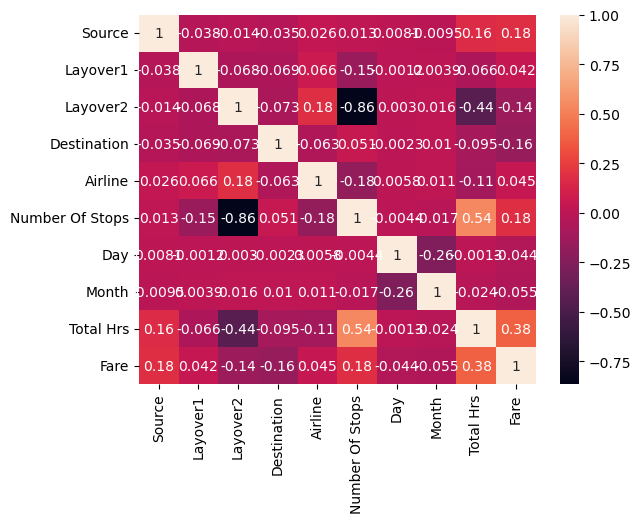

In [59]:
sns.heatmap(df.corr(), annot=True)

In [60]:
df.describe()

,Source,Layover1,Layover2,Destination,Airline,Number Of Stops,Day,Month,Total Hrs,Fare
count,30024.000000,30024.000000,30024.000000,30024.000000,30024.000000,30024.000000,30024.000000,30024.000000,30024.000000,30024.000000
mean,69.369538,79.709033,70.817379,38.264722,44.985212,1.332367,15.178091,1.478084,19.198100,34223.542699
std,42.116370,50.931059,30.931911,24.076691,36.310132,0.554113,8.650791,0.499528,10.647467,48169.945151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.250000,1299.000000
25%,33.000000,47.000000,43.000000,17.000000,8.000000,1.000000,8.000000,1.000000,10.420000,9573.750000
50%,63.000000,62.000000,93.000000,33.000000,37.000000,1.000000,16.000000,1.000000,18.330000,16289.000000
75%,108.000000,124.000000,93.000000,53.000000,72.000000,2.000000,23.000000,2.000000,26.420000,41573.250000
max,160.000000,194.000000,93.000000,84.000000,114.000000,3.000000,30.000000,2.000000,82.080000,930341.000000


## Encoding of Independent & Dependent Data

In [61]:
X = df.iloc[:, 2:-1]
y = df.iloc[:, -1]

In [62]:
X

,Source,Layover1,Layover2,Destination,Airline,Number Of Stops,Day,Month,Total Hrs
0,50,126,23,45,76,2,6,2,20.42
1,43,194,93,60,97,0,1,2,1.67
2,108,148,43,71,8,2,23,1,21.33
3,110,124,29,65,8,2,3,2,17.58
4,108,75,93,82,51,1,6,1,9.25
...,...,...,...,...,...,...,...,...,...
30019,43,75,58,82,8,2,27,2,19.42
30020,140,97,23,1,72,2,8,2,19.17
30021,109,124,23,50,8,2,3,2,19.33
30022,62,4,93,29,51,1,6,2,8.83


In [63]:
y

0        26224.0
1         2889.0
2        13518.0
3        12528.0
4         8240.0
          ...   
30019    11651.0
30020    56035.0
30021    18652.0
30022     6201.0
30023    22158.0
Name: Fare, Length: 30024, dtype: float64

## Splitting the dataset into the Training set and Test set

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [65]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((22518, 9), (22518,), (7506, 9), (7506,))

## Machine Learning

### Random Forest Regressor

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [67]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=50, random_state=10)
rfr.fit(X_train, y_train)
y_predRFR = rfr.predict(X_test)

acc_rfrTrain = rfr.score(X_train, y_train) * 100
acc_rfrTest = rfr.score(X_test, y_test) * 100

print("Training Accuracy: ", acc_rfrTrain)
print("Testing Accuracy: ", acc_rfrTest)

Training Accuracy:  95.2694172476619
Testing Accuracy:  66.84849808174451


In [68]:
MAE_RFR = mean_absolute_error(y_test, y_predRFR)
MSE_RFR = mean_squared_error(y_test, y_predRFR)
RMSE_RFR = np.sqrt(MSE_RFR)

print("Random Forest Regressor")
print(f"MAE: {round(MAE_RFR, 2)}")
print(f"MSE: {round(MSE_RFR, 2)}")
print(f"RMSE: {round(RMSE_RFR, 2)}")

Random Forest Regressor
MAE: 11365.77
MSE: 781831807.56
RMSE: 27961.26


In [69]:
test_results_RFR = y_test - y_predRFR
test_results_RFR.describe()

count      7506.000000
mean       -623.427821
std       27956.166910
min     -268280.960000
25%       -5446.195000
50%       -1477.640000
75%        2133.705000
max      627882.956667
Name: Fare, dtype: float64

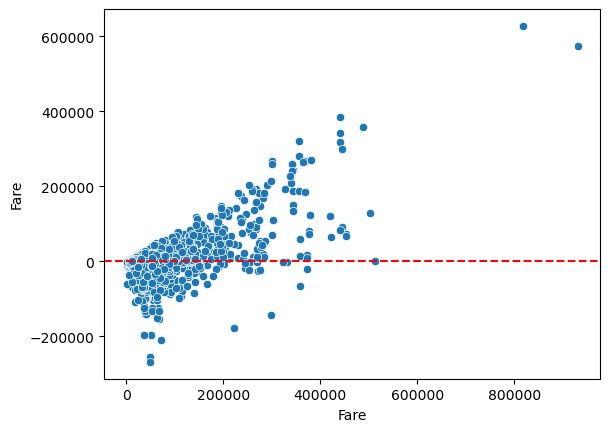

In [70]:
sns.scatterplot(x = y_test, y = test_results_RFR)
plt.axhline(y=0, color='r', linestyle='--')

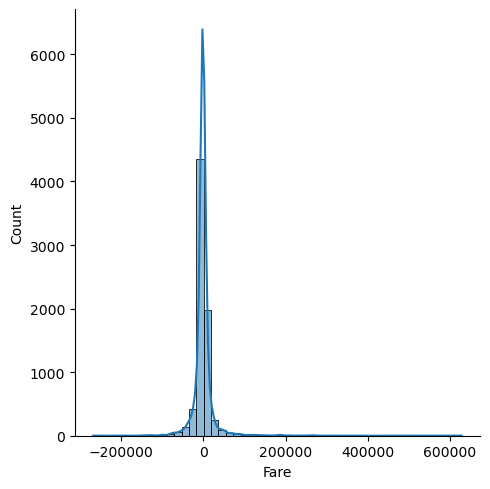

In [71]:
sns.displot(test_results_RFR, bins=50, kde=True)

### Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_predLR = lr.predict(X_test)

acc_lrTrain = lr.score(X_train, y_train) * 100
acc_lrTest = lr.score(X_test, y_test) * 100

print("Training Accuracy: ", acc_lrTrain)
print("Testing Accuracy: ", acc_lrTest)
print("Coefficient: ", lr.coef_)
print("Constant: ", lr.intercept_)

Training Accuracy:  18.490295261798607
Testing Accuracy:  20.10707937340227
Coefficient:  [  135.03406475    69.72092758   128.92562757  -214.0694626
   100.59155363  8329.28323932  -346.72684427 -5872.20725333
  1544.40375   ]
Constant:  -12928.048778458542


In [73]:
MAE_LR = mean_absolute_error(y_test, y_predLR)
MSE_LR = mean_squared_error(y_test, y_predLR)
RMSE_LR = np.sqrt(MSE_LR)

print("Linear Regression")
print(f"MAE: {round(MAE_LR, 2)}")
print(f"MSE: {round(MSE_LR, 2)}")
print(f"RMSE: {round(RMSE_LR, 2)}")

Linear Regression
MAE: 23414.26
MSE: 1884162795.97
RMSE: 43406.94


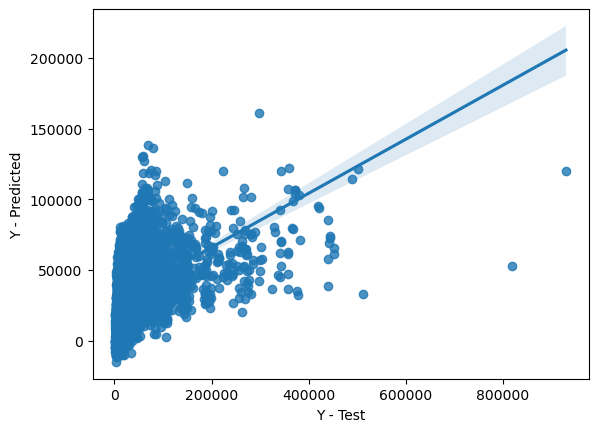

In [74]:
sns.regplot(x = y_test, y = y_predLR)
plt.xlabel('Y - Test')
plt.ylabel('Y - Predicted')
plt.show()

In [75]:
test_results_LR = y_test - y_predLR
test_results_LR.describe()

count      7506.000000
mean       -168.245295
std       43409.509788
min      -72138.591399
25%      -20177.624552
50%       -7784.337222
75%        5259.155437
max      810188.742742
Name: Fare, dtype: float64

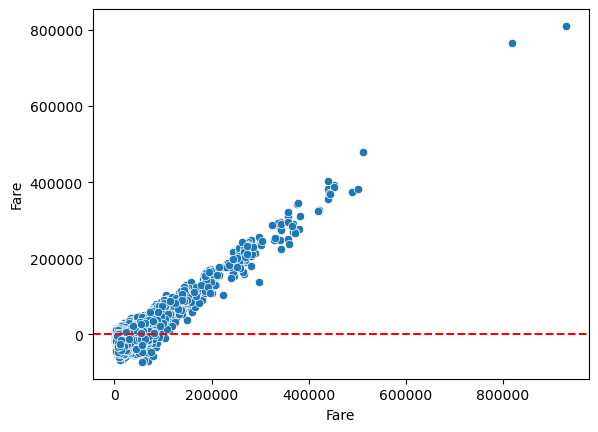

In [76]:
sns.scatterplot(x = y_test, y = test_results_LR)
plt.axhline(y=0, color='r', linestyle='--')

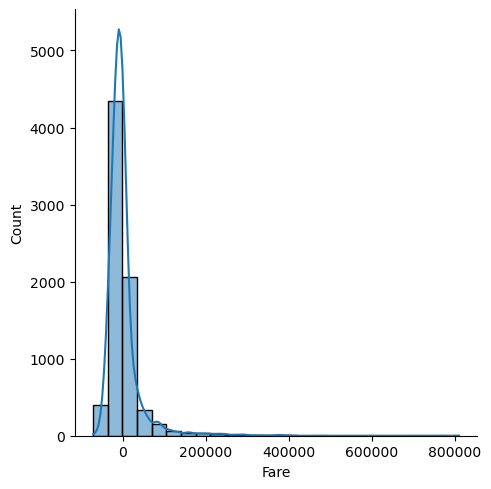

In [77]:
sns.displot(test_results_LR, bins=25, kde=True)

### Decision Tree Regressor

In [78]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_leaf_nodes=50, max_depth=10)
dtr.fit(X_train,y_train)
y_predDTR = dtr.predict(X_test)

acc_dtrTrain = dtr.score(X_train, y_train) * 100
acc_dtrTest = rfr.score(X_test, y_test) * 100

print("Training Accuracy: ", acc_dtrTrain)
print("Testing Accuracy: ", acc_dtrTest)

Training Accuracy:  52.35259108518498
Testing Accuracy:  66.84849808174451


In [79]:
MAE_DTR = mean_absolute_error(y_test, y_predDTR)
MSE_DTR = mean_squared_error(y_test, y_predDTR)
RMSE_DTR = np.sqrt(MSE_DTR)

print("Decision Tree Regressor")
print(f"MAE: {round(MAE_DTR, 2)}")
print(f"MSE: {round(MSE_DTR, 2)}")
print(f"RMSE: {round(RMSE_DTR, 2)}")

Decision Tree Regressor
MAE: 17415.11
MSE: 1259324032.61
RMSE: 35486.96


In [80]:
test_results_DTR = y_test - y_predDTR
test_results_DTR.describe()

count      7506.000000
mean       -221.178512
std       35488.630632
min     -275808.000000
25%       -8906.704773
50%       -4450.140166
75%        3952.020028
max      761212.103523
Name: Fare, dtype: float64

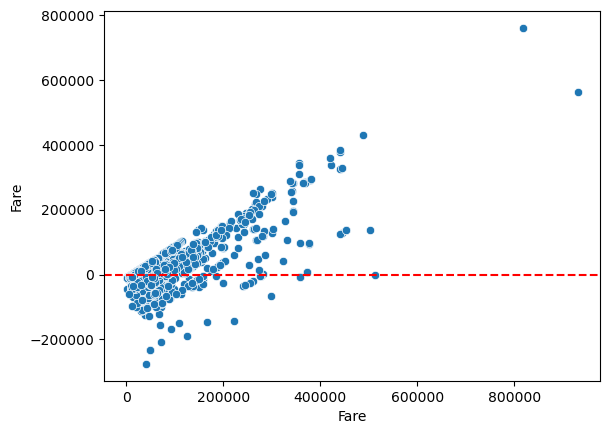

In [81]:
sns.scatterplot(x = y_test, y = test_results_DTR)
plt.axhline(y=0, color='r', linestyle='--')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

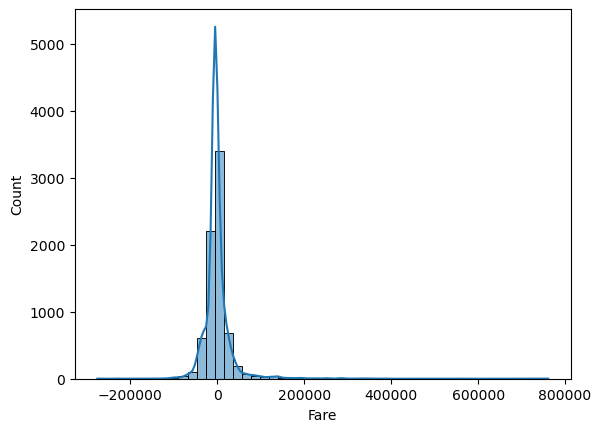

In [82]:
sns.histplot(test_results_DTR, bins=50, kde=True)

## Performance Analysis

In [83]:
performance_df = pd.DataFrame({'Algorithm':['Random Forest Regressor', 'Linear Regression', 'Decision Tree Regressor'], 'Training Accuracy':[acc_rfrTrain, acc_lrTrain, acc_dtrTrain], 'Testing Accuracy':[acc_rfrTest, acc_lrTest, acc_dtrTest], 'RMSE':[RMSE_RFR, RMSE_LR, RMSE_DTR]}).set_index('Algorithm')

In [84]:
performance_df.sort_values('Testing Accuracy', ascending=False)

,Training Accuracy,Testing Accuracy,RMSE
Algorithm,,,
Random Forest Regressor,95.269417,66.848498,27961.255472
Decision Tree Regressor,52.352591,66.848498,35486.955809
Linear Regression,18.490295,20.107079,43406.944099


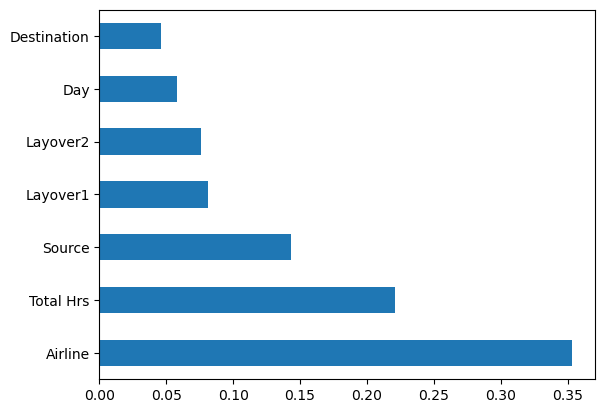

In [85]:
feat_importances = pd.Series(rfr.feature_importances_, index=X_train.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

## Training Model for all use cases

### Multicity-2

In [86]:
X1 = df[df['Number Of Stops'] == 2].iloc[:, 2:-1]
y1 = df[df['Number Of Stops'] == 2].iloc[:, -1]

In [87]:
rfr1 = RandomForestRegressor(n_estimators=50, random_state=10)
rfr1.fit(X1, y1)

RandomForestRegressor(n_estimators=50, random_state=10)

### Multicity-1

In [88]:
X2 = df[df['Number Of Stops'] == 1].iloc[:, 2:-1]
y2 = df[df['Number Of Stops'] == 1].iloc[:, -1]

X2 = X2.drop("Layover2", axis= 1)

In [89]:
rfr2 = RandomForestRegressor(n_estimators=50, random_state=10)
rfr2.fit(X2, y2)

RandomForestRegressor(n_estimators=50, random_state=10)

### Oneway

In [90]:
X3 = df[df['Number Of Stops'] == 0].iloc[:, 2:-1]
y3 = df[df['Number Of Stops'] == 0].iloc[:, -1]

X3 = X3.drop(["Layover1", "Layover2"], axis= 1)

In [91]:
rfr3 = RandomForestRegressor(n_estimators=50, random_state=10)
rfr3.fit(X3, y3)

RandomForestRegressor(n_estimators=50, random_state=10)

## Exporting Models

In [92]:
import joblib

In [93]:
joblib.dump(rfr1,'farePrediction_model_RFR_multiCity2.pkl')
joblib.dump(rfr2,'farePrediction_model_RFR_multiCity1.pkl')
joblib.dump(rfr3,'farePrediction_model_RFR_oneWay.pkl')

['farePrediction_model_RFR_oneWay.pkl']

In [94]:
Source = pd.Series(temp["Source"].unique())
Destination = pd.Series(temp["Destination"].unique())
Airline = pd.Series(temp["Airline"].unique())
Layover1 = pd.Series(temp["Layover1"].unique())
Layover2 = pd.Series(temp["Layover2"].unique())

In [95]:
Source.to_csv("Source.csv", index = False)
Destination.to_csv("Destination.csv", index = False)
Airline.to_csv("Airline.csv", index=False)
Layover1.to_csv("Layover1.csv", index=False)
Layover2.to_csv("Layover2.csv", index=False)

In [96]:
labled_source = LabelEncoder()
labled_destination = LabelEncoder()
labled_airline = LabelEncoder()
labled_layover1 = LabelEncoder()
labled_layover2 = LabelEncoder()

In [97]:
labled_source.fit(Source)
labled_destination.fit(Destination)
labled_airline.fit(Airline)
labled_layover1.fit(Layover1)
labled_layover2.fit(Layover2)

LabelEncoder()

In [98]:
joblib.dump(labled_source,'label_encoder_source.pkl')
joblib.dump(labled_destination,'label_encoder_destination.pkl')
joblib.dump(labled_airline,'label_encoder_airline.pkl')
joblib.dump(labled_layover1,'label_encoder_layover1.pkl')
joblib.dump(labled_layover2,'label_encoder_layover2.pkl')

['label_encoder_layover2.pkl']

## Importing Models

In [99]:
loaded_leSource = joblib.load('label_encoder_source.pkl')
loaded_leDest = joblib.load('label_encoder_destination.pkl')
loaded_leAirline = joblib.load('label_encoder_airline.pkl')
loaded_leLayover1 = joblib.load('label_encoder_layover1.pkl')
loaded_leLayover2 = joblib.load('label_encoder_layover2.pkl')

### For Multicity-2

In [100]:
loaded_model1 = joblib.load('farePrediction_model_RFR_multiCity2.pkl')

In [101]:
temp[temp['Number Of Stops'] == 2].head(1)

,D_Date_Time,A_Date_Time,Source,Layover1,Layover2,Destination,Airline,Number Of Stops,Day,Month,Total Hrs,Fare
0,2020-02-06 22:45:00,2020-02-07 19:10:00,Dubai,Muscat,Delhi,Kolkata,Oman Air,2,6,2,20.42,26224.0


In [102]:
Src = loaded_leSource.transform(["Dubai"])
Dest = loaded_leDest.transform(["Kolkata"])
Airl = loaded_leAirline.transform(["Oman Air"])
L1 = loaded_leLayover1.transform(["Muscat"])
L2 = loaded_leLayover2.transform(["Delhi"])

In [103]:
loaded_model1.predict([[Src, L1, L2, Dest, Airl, 2, 6, 2, 20.42]])

array([27387.96])

### For Multicity-1

In [104]:
loaded_model2 = joblib.load('farePrediction_model_RFR_multiCity1.pkl')

In [105]:
temp[temp['Number Of Stops'] == 1].head(1)

,D_Date_Time,A_Date_Time,Source,Layover1,Layover2,Destination,Airline,Number Of Stops,Day,Month,Total Hrs,Fare
4,2020-01-06 00:50:00,2020-01-06 10:05:00,Mumbai,Hyderabad,NaN,Varanasi,Indigo,1,6,1,9.25,8240.0


In [106]:
Src = loaded_leSource.transform(["Mumbai"])
Dest = loaded_leDest.transform(["Varanasi"])
Airl = loaded_leAirline.transform(["Indigo"])
L1 = loaded_leLayover1.transform(["Hyderabad"])

In [107]:
loaded_model2.predict([[Src, L1, Dest, Airl, 1, 6, 1, 9.25]])

array([9249.4])

### For OneWay

In [108]:
loaded_model3 = joblib.load('farePrediction_model_RFR_oneWay.pkl')

In [109]:
temp[temp['Number Of Stops'] == 0].head(1)

,D_Date_Time,A_Date_Time,Source,Layover1,Layover2,Destination,Airline,Number Of Stops,Day,Month,Total Hrs,Fare
1,2020-02-01 15:45:00,2020-02-01 17:25:00,Delhi,NaN,NaN,Patna,SpiceJet,0,1,2,1.67,2889.0


In [110]:
Src = loaded_leSource.transform(["Delhi"])
Dest = loaded_leDest.transform(["Patna"])
Airl = loaded_leAirline.transform(["SpiceJet"])

In [111]:
loaded_model3.predict([[Src, Dest, Airl, 0, 1, 2, 1.67]])

array([3805.32])